In [1]:
from __future__ import unicode_literals
import unicodecsv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle

import สีของ Tableau มาใช้

In [2]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

shuffle_index = list(range(len(tableau20)))
shuffle(shuffle_index)

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
new_tableau20 = []
for i in shuffle_index:    
    r, g, b = tableau20[i]    
    new_tableau20.append((r / 255., g / 255., b / 255.))
print(len(new_tableau20))

20


In [3]:
product = pd.read_csv('../data_clean/product.csv', dtype={'MVGR3': str,'MVGR7': str,'DEPT_ID1': str})

In [4]:
product[0:5]

,MATNR,MAKTX,DEPT_ID1,MVGR1,MVGR2,MVGR3,MVGR4,MVGR5,MVGR6,MVGR7,STY_ID,META_K,EX_CONTENT_ID,EX_UNIMODEL,EX_PORT,EX_STOCK,EX_SALE_PERCENT,EX_RATING_COUNT,EX_RATING,EX_AVG_RATING
0,19047936,PATISIA/ตู้ข้างเตียงNT45/ขาว,1,14,A20,2,70,J9,01,9,14.0,"SB,KONCEPT FURNITURE,Patisia,ชุดห้องนอน,โต๊ะ/ต...",NaN,19047936.0,V,0,30.0,15.0,70.0,4.666667
1,19045101,โซฟาCANNERY/นต.HE51-12/เหลือง-ลายทาง/3S,3,10,059,35,59,B2,32,8,6.0,"SB,SB FURNITURE,Cannery,Sofa Fabric,โซฟา 3 ที่...",NaN,19045101.0,V,-3,25.0,0.0,0.0,0.000000
2,19050282,VPกรอบรูป#HD5937A/ไม้ขัดสี,6,19,,51,B4,,58,23,14.0,"SB,VINTAGE PASSION,,กรอบรูปและภาพแขวน,กรอบรูป,",NaN,19050282.0,V,0,0.0,0.0,0.0,0.000000
3,59000365,Bedroom/Meudon 6'&Isis/Wenge,1,14,598,2,CD,05,D6,9,3.0,"SB,เอส.บี,เฟอร์นิเจอร์,KONCEPT FURNITURE,Meudo...","36,332",59000365.0,C,-24,32.0,0.0,0.0,0.000000
4,59001810,Bedroom/ALicia-E 6'&Meudon/White/Re,1,14,466,2,CD,05,01,9,6.0,"SB,เอส.บี,เฟอร์นิเจอร์,KONCEPT FURNITURE,Alici...",NaN,59001810.0,V,0,32.0,0.0,0.0,0.000000


In [5]:
len(product)

27187

In [6]:
len(product['MATNR'].unique())

27187

# แบ่งกลุ่มตาม Style (STY_ID x style.csv)

In [7]:
style = pd.read_csv('../data_clean/style.csv')
print(len(style))
style[0:5]

24


,STY_ID,STYLE
0,1,Artdeco
1,2,Colour Passion
2,3,Contemporary
3,4,Ecolism
4,5,Luxury Glamorous


เมื่อ style LEFT JOIN product จะเห็นว่ามี product ระบุ style ไม่ได้อยู่ 2251 ขิ้น

In [8]:
product_x_style = pd.merge(style,product, how='left', on=['STY_ID'])
print(len(product_x_style))
product_grouped = product_x_style.groupby(['STYLE']).size().sort_values(ascending=True)
product_grouped

24936


STYLE
Antique                   14
Modern Scandinavian       17
Renaissance               17
Minimal                   29
Ecolism                   39
Oriental Aspire           39
Neo Baroque               41
Transitional              50
Loft                      62
Classic                   68
Artdeco                  129
Modern Chic              151
Modern Classic           174
Colour Passion           187
Industrial               227
Modern Contemporary      264
Luxury Glamorous         382
Modern Luxury            414
Luxury                   676
Scandinavian             829
Modern Italian          1561
Contemporary            2179
Vintage                 4493
Modern                 12894
dtype: int64

ทำเป็น Pie Chart

In [9]:
old_labels = product_grouped.keys()
old_sizes = product_grouped.tolist()

In [10]:
label_odd = []
label_even = []
size_odd = []
size_even = []
for i in range(len(product_grouped)):
    if i%2 == 0:
        label_even.append(old_labels[i])
        size_even.append(old_sizes[i])
    else:
        label_odd.append(old_labels[i])
        size_odd.append(old_sizes[i]) 

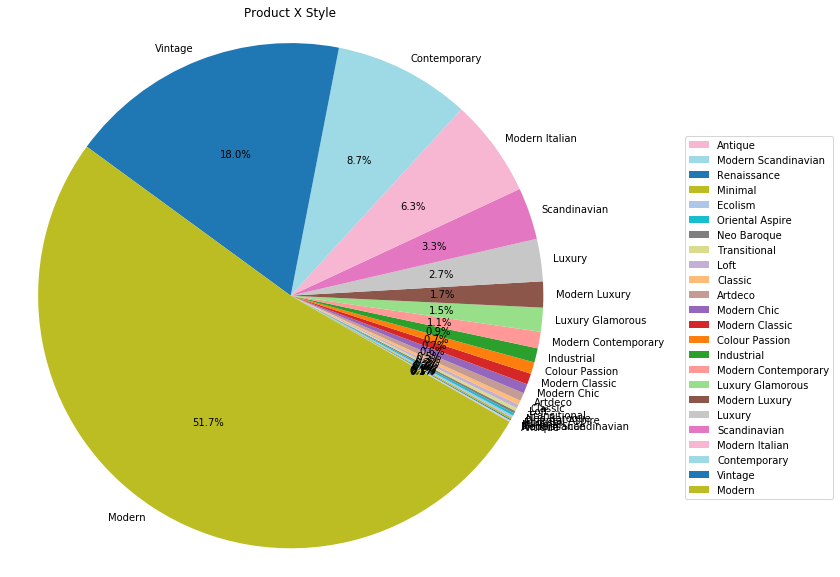

In [11]:
# Data to plot
sizes = product_grouped.tolist()
labels = product_grouped.keys()
explode = np.zeros(len(sizes)) # explode max value
explode[sizes.index(max(sizes))] = 0.0
    
colors = []
for i in range(len(sizes)):
    colors.append(new_tableau20[i%len(new_tableau20)])
 
plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,colors=colors, labels=labels,labeldistance=1.05,autopct='%1.1f%%', shadow=False, startangle=-30)
plt.axis('equal')
plt.title("Product X Style")
plt.legend(bbox_to_anchor=(1.2,0.8), loc="upper left")
plt.show()

# แบ่งกลุ่มตาม Brand (MVGR1 x Brand.csv)

In [12]:
brand = pd.read_csv('../data_clean/md1t_brand.csv')
print(len(brand))
brand[0:5]

155


,NODE,LTEXT
0,32,SOLUTION
1,K6,INSPIRE
2,G5,PARKER&MORGAN
3,G6,P&M STUDIO
4,31,KUCHE


In [13]:
product_x_brand = pd.merge(brand,product, how='left', left_on=['NODE'], right_on =['MVGR1'])
print(len(product_x_brand))
product_brand_grouped = product_x_brand.groupby(['LTEXT']).size().sort_values()
print(len(product_brand_grouped))
product_brand_grouped = product_brand_grouped[product_brand_grouped > 1]
product_brand_grouped

27316
155


LTEXT
PODIUM                   3
ACCESS                   7
CUCINE                  24
LORENZO                 29
METROPOLE               31
YVES MAISON             42
KUCHE                   50
AUTHENTIC               55
KELVIN GIORMANI         67
UNIVERSAL               99
JUVE CULTURE           114
COUNTRY CORNER         173
HABITAT                365
LE LUXE                376
POSH ATELIER           459
ZELECTION              492
LUMBER YARD            566
HERITAGE               594
FRENCH PROVENCE        770
SCHULTZ DESIGN        1002
CLICHE                1085
SB DESIGN SQUARE      1670
VINTAGE PASSION       3539
KONCEPT FURNITURE     5436
SB FURNITURE         10138
dtype: int64

In [14]:
old_labels = product_brand_grouped.keys()
old_sizes = product_brand_grouped.tolist()

In [15]:
label_odd = []
label_even = []
size_odd = []
size_even = []
for i in range(len(product_brand_grouped)):
    if i%2 == 0:
        label_even.append(old_labels[i])
        size_even.append(old_sizes[i])
    else:
        label_odd.append(old_labels[i])
        size_odd.append(old_sizes[i]) 

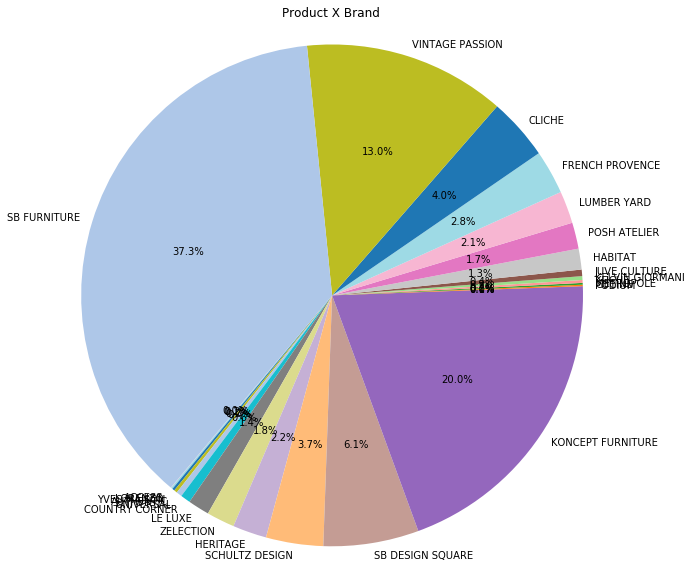

In [16]:
# Data to plot
sizes = size_odd+size_even
labels = label_odd+label_even
explode = np.zeros(len(sizes)) # explode max value
explode[sizes.index(max(sizes))] = 0.0
    
colors = []
for i in range(len(sizes)):
    colors.append(new_tableau20[i%len(new_tableau20)])
 
plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,colors=colors, labels=labels,labeldistance=1.05,autopct='%1.1f%%', shadow=False, startangle=230)
plt.axis('equal')
plt.title("Product X Brand")
plt.show()

# แบ่งกลุ่มตาม Model (MVGR2 x Model.csv)

In [17]:
model = pd.read_csv('../data_clean/md2t_model.csv')
print(len(model))
model[0:5]

7236


,NODE,LTEXT,LTEXT_T
0,AW7,Tonio,NaN
1,AW8,Toronto,NaN
2,AW9,Tritus,NaN
3,AX1,Turko,NaN
4,AX2,Tycoon,NaN


In [18]:
product_x_model = pd.merge(model,product, how='left', left_on=['NODE'], right_on =['MVGR2'])
print(len(product_x_model))
product_model_grouped = product_x_model.groupby(['LTEXT']).size().sort_values(ascending=False)
product_model_grouped = product_model_grouped[product_model_grouped > 1]
print(len(product_model_grouped))
product_model_grouped

26704
1787


LTEXT
All about Vintage      808
Modern Basic           658
Modern                 462
TURN OF THE CENTURY    377
Kourmet                372
Scenario               348
Deco Series            308
Vintage Retro          270
Infinity               242
Cliche Home            227
French Classic         223
COTTAGE CHIC           201
Exio                   183
Modern Luxury          175
BRISTOL TERRACE        159
Able                   156
Viggo                  140
Tyler                  135
Riverra                126
Wardrobe Plus B-93     126
Wardrobe Customize     125
Patinal                125
Antique                124
Econi                  123
Wardrobe Plus A-93     122
Cannery                122
Wardrobe Plus C2-93    121
Wardrobe Plus E2-93    121
Spazio                 121
CHATEAU                120
                      ... 
Baroque                  2
Titer                    2
Hageisa                  2
Frownden Plus            2
INT2771                  2
Jan                   

In [19]:
product_model_grouped = product_model_grouped[0:100] 
product_model_grouped

LTEXT
All about Vintage      808
Modern Basic           658
Modern                 462
TURN OF THE CENTURY    377
Kourmet                372
Scenario               348
Deco Series            308
Vintage Retro          270
Infinity               242
Cliche Home            227
French Classic         223
COTTAGE CHIC           201
Exio                   183
Modern Luxury          175
BRISTOL TERRACE        159
Able                   156
Viggo                  140
Tyler                  135
Riverra                126
Wardrobe Plus B-93     126
Wardrobe Customize     125
Patinal                125
Antique                124
Econi                  123
Wardrobe Plus A-93     122
Cannery                122
Wardrobe Plus C2-93    121
Wardrobe Plus E2-93    121
Spazio                 121
CHATEAU                120
                      ... 
Rubik                   66
Art                     65
River House             64
Lepino                  62
Minimo                  62
Zioni                 

In [20]:
old_labels = product_model_grouped.keys()
old_sizes = product_model_grouped.tolist()

In [21]:
label_odd = []
label_even = []
size_odd = []
size_even = []
for i in range(len(old_sizes)):
    if i%2 == 0:
        label_even.append(old_labels[i])
        size_even.append(old_sizes[i])
    else:
        label_odd.append(old_labels[i])
        size_odd.append(old_sizes[i]) 

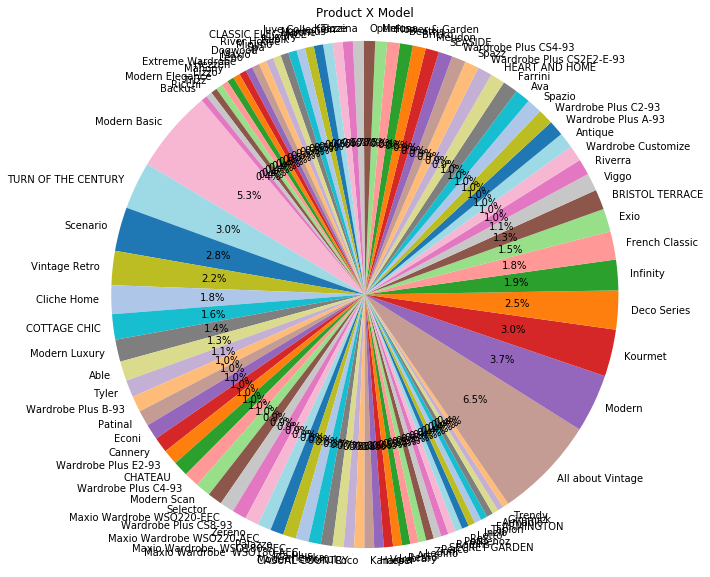

In [22]:
# Data to plot
sizes = size_odd+size_even
labels = label_odd+label_even
explode = np.zeros(len(sizes)) # explode max value
explode[sizes.index(max(sizes))] = 0.0
    
colors = []
for i in range(len(sizes)):
    colors.append(new_tableau20[i%len(new_tableau20)])
 
plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,colors=colors, labels=labels,labeldistance=1.05,autopct='%1.1f%%', shadow=False, startangle=130)
plt.axis('equal')
plt.title("Product X Model")
plt.show()

# แบ่งกลุ่มตาม Cat1 (MVGR3 x cat1.csv)

In [447]:
cat1 = pd.read_csv('../data_clean/md3t_cat1.csv')
print(len(cat1))
cat1[0:5]

61


,NODE,LTEXT
0,47,อุปกรณ์การจัดเก็บ
1,48,โคมไฟ
2,49,ของใช้ในครัว
3,50,สินค้าสำหรับเด็ก
4,51,กรอบรูปและภาพแขวน


In [450]:
product_x_cat1 = pd.merge(cat1,product, how='left', left_on=['NODE'], right_on =['MVGR3'])
print(len(product_x_cat1))
product_cat1_grouped = product_x_cat1.groupby(['LTEXT']).size().sort_values(ascending=False)
product_cat1_grouped = product_cat1_grouped[product_cat1_grouped > 1]
print(len(product_cat1_grouped))
product_cat1_grouped

17336
36


LTEXT
กรอบรูปและภาพแขวน                           2399
โซฟาผ้า                                     2110
ซีรีย์ตู้เสื้อผ้า                           1959
ห้องรับแขก                                  1737
อุปกรณ์การจัดเก็บ                           1240
ตู้เก็บของ                                   811
โคมไฟ                                        670
หมอนอิงและสตูล                               654
นาฬิกา                                       608
เฟอร์นิเจอร์สำนักงาน                         570
ชุดครัว                                      555
ของใช้บนโต๊ะอาหาร                            533
อาร์มแชร์                                    415
สินค้าสั่งทำ                                 363
ห้องแต่งตัว                                  336
อุปกรณ์ตกแต่งสวน                             327
โซฟาหนังสังเคราะห์                           324
โซฟาหนังแท้                                  309
กระจก                                        296
พรม                                          196
โซฟาหนังแท้ทั้

In [454]:
old_labels = product_cat1_grouped.keys()
old_sizes = product_cat1_grouped.tolist()

In [455]:
label_odd = []
label_even = []
size_odd = []
size_even = []
for i in range(len(old_sizes)):
    if i%2 == 0:
        label_even.append(old_labels[i])
        size_even.append(old_sizes[i])
    else:
        label_odd.append(old_labels[i])
        size_odd.append(old_sizes[i]) 

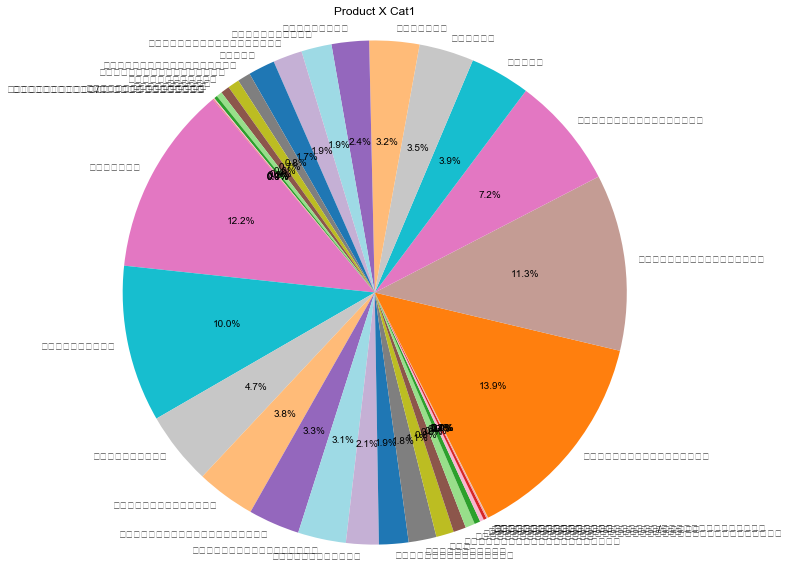

In [463]:
# Data to plot
sizes = size_odd+size_even
labels = label_odd+label_even
explode = np.zeros(len(sizes)) # explode max value
explode[sizes.index(max(sizes))] = 0.0
    
colors = []
for i in range(len(sizes)):
    colors.append(new_tableau20[i%len(new_tableau20)])
 
plt.figure(figsize=(10,10))
plt.rcParams["font.family"] = "Arial"
plt.pie(sizes,explode=explode,colors=colors, labels=labels,labeldistance=1.05,autopct='%1.1f%%', shadow=False, startangle=130)
plt.axis('equal')
plt.title("Product X Cat1")
plt.show()

# แบ่งกลุ่มตาม Cat2 (MVGR4 x cat2.csv)

In [465]:
cat2 = pd.read_csv('../data_clean/md4t_cat2.csv')
print(len(cat2))
cat2[0:5]

436


,NODE,LTEXT,LTEXT_T
0,BG,ม่านตาไก่,Pierced
1,BH,ม่านหลุยส์,Louise
2,BI,ม่านคอกระเช้า,Loop
3,BJ,มู่ลี่ไม้,Wooden Blind
4,BK,มู่ลี่อลูมิเนียม,Venetian Blind


In [466]:
product_x_cat2 = pd.merge(cat2,product, how='left', left_on=['NODE'], right_on =['MVGR4'])
print(len(product_x_cat2))
product_cat2_grouped = product_x_cat2.groupby(['LTEXT']).size().sort_values(ascending=False)
product_cat2_grouped = product_cat2_grouped[product_cat2_grouped > 1]
print(len(product_cat2_grouped))
product_cat2_grouped

26587
216


LTEXT
ภาพแขวน                            1831
เตียง                              1552
ชุดห้องนอน                         1005
โซฟาสั่งทำ                          979
ซีรีย์ตู้ผ้า WD Plus                942
ของตกแต่งอื่น ๆ                     623
กรอบรูป                             572
ไซด์บอร์ด                           555
หมอนอิง                             543
ตู้เสื้อผ้าบานเปิด                  487
โซฟา 3 ที่นั่ง                      484
โต๊ะทำงาน                           445
ซีรีย์ตู้ผ้า Maxio                  400
โต๊ะอาหารไม้ล้วน                    388
ชุดครัว Kourmet                     372
ตู้สูง                              363
นาฬิกาแขวนผนัง                      358
ตู้เตี้ยลิ้นชัก                     341
กล่องอเนกประสงค์                    340
โซฟาเข้ามุมขวา                      336
โคมไฟตั้งโต๊ะ                       331
อาร์มแชร์ผ้า                        329
เก้าอี้ไม้เบาะผ้า                   310
เซรามิคตกแต่ง                       302
หนังสือปลอม                       

In [467]:
old_labels = product_cat2_grouped.keys()
old_sizes = product_cat2_grouped.tolist()

In [468]:
label_odd = []
label_even = []
size_odd = []
size_even = []
for i in range(len(old_sizes)):
    if i%2 == 0:
        label_even.append(old_labels[i])
        size_even.append(old_sizes[i])
    else:
        label_odd.append(old_labels[i])
        size_odd.append(old_sizes[i]) 

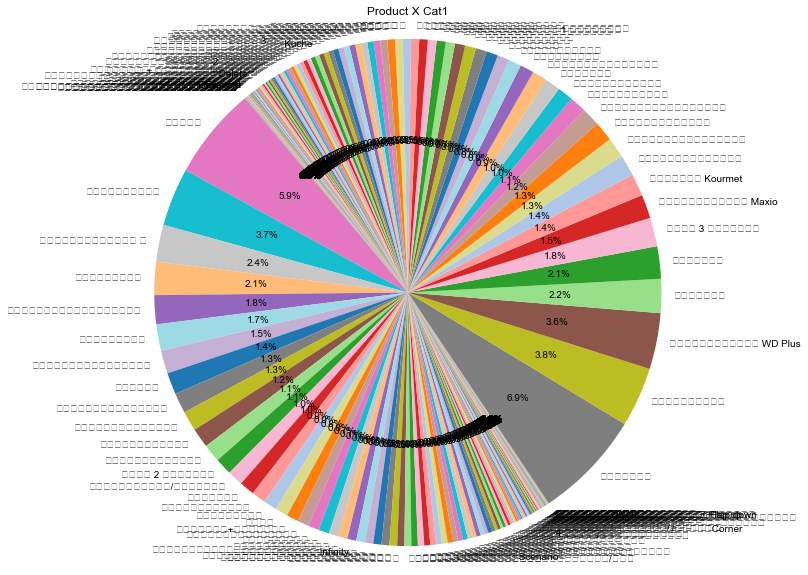

In [469]:
# Data to plot
sizes = size_odd+size_even
labels = label_odd+label_even
explode = np.zeros(len(sizes)) # explode max value
explode[sizes.index(max(sizes))] = 0.0
    
colors = []
for i in range(len(sizes)):
    colors.append(new_tableau20[i%len(new_tableau20)])
 
plt.figure(figsize=(10,10))
plt.rcParams["font.family"] = "Arial"
plt.pie(sizes,explode=explode,colors=colors, labels=labels,labeldistance=1.05,autopct='%1.1f%%', shadow=False, startangle=130)
plt.axis('equal')
plt.title("Product X Cat1")
plt.show()

# แบ่งกลุ่มตาม Cat3 (MVGR5 x cat3.csv)

In [470]:
cat3 = pd.read_csv('../data_clean/md5t_cat3.csv')
print(len(cat3))
cat3[0:5]

390


,NODE,LTEXT
0,59,ตู้เสื้อผ้าบานเปิดขนาด 47
1,60,ตู้เสื้อผ้าบานเปิดขนาด 80
2,61,ตู้เสื้อผ้าบานเปิดขนาด 90
3,62,ตู้เสื้อผ้าบานเปิดขนาด 93
4,63,ตู้เสื้อผ้าบานเฟี้ยมขนาด 139


In [471]:
product_x_cat3 = pd.merge(cat3,product, how='left', left_on=['NODE'], right_on =['MVGR5'])
print(len(product_x_cat3))
product_cat3_grouped = product_x_cat3.groupby(['LTEXT']).size().sort_values(ascending=False)
product_cat3_grouped = product_cat3_grouped[product_cat3_grouped > 1]
print(len(product_cat3_grouped))
product_cat3_grouped

11143
197


LTEXT
เตียง 6 ฟุต                      1263
ซีรีย์ตู้ผ้าWDPlus93             1006
เตียง 5 ฟุต                       918
โซฟาขนาด2-2.5m                    560
โซฟาขนาดเล็กกว่า1.8 m             435
โซฟาขนาด2.5-3m                    325
โต๊ะอาหารขนาด 150-179             260
โซฟาขนาด1.8-2.m                   238
เตียง 3.5 ฟุต                     224
ซีรีย์ตู้ผ้าMaxio230              223
ซีรีย์ตู้ผ้าMaxio180              221
หน้าบานเปิด                       188
ไซด์บอร์ดขนาด 120                 186
ชุดวางทีวี>270                    180
โต๊ะอาหารขนาด 120-149             167
โต๊ะอาหารขนาด 180-199             140
โต๊ะอาหารขนาด 80-119              134
Kitchen Set 160                   129
โต๊ะทำงานขนาด 120                 126
โต๊ะกลางขนาด 120-140              125
เตียงขนาดพิเศษ                    115
ชุดห้องนอน(6 ฟุต)                 114
ไซด์บอร์ดขนาด 180                 113
Kitchen Set 120                   112
รีไคล์เนอร์ขนาดเล็กกว่า1.8m       106
ไซด์บอร์ดขนาด 150                 105
โซฟาขน

In [472]:
old_labels = product_cat3_grouped.keys()
old_sizes = product_cat3_grouped.tolist()

In [473]:
label_odd = []
label_even = []
size_odd = []
size_even = []
for i in range(len(old_sizes)):
    if i%2 == 0:
        label_even.append(old_labels[i])
        size_even.append(old_sizes[i])
    else:
        label_odd.append(old_labels[i])
        size_odd.append(old_sizes[i]) 

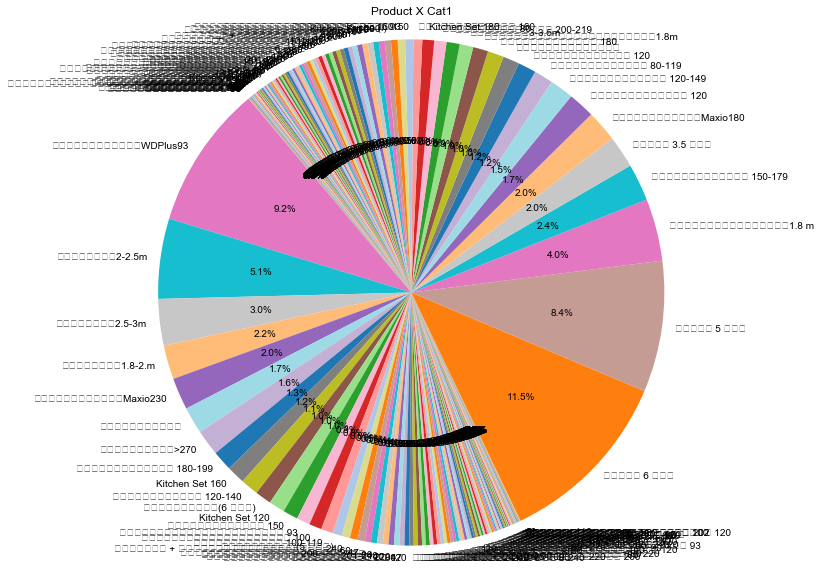

In [474]:
# Data to plot
sizes = size_odd+size_even
labels = label_odd+label_even
explode = np.zeros(len(sizes)) # explode max value
explode[sizes.index(max(sizes))] = 0.0
    
colors = []
for i in range(len(sizes)):
    colors.append(new_tableau20[i%len(new_tableau20)])
 
plt.figure(figsize=(10,10))
plt.rcParams["font.family"] = "Arial"
plt.pie(sizes,explode=explode,colors=colors, labels=labels,labeldistance=1.05,autopct='%1.1f%%', shadow=False, startangle=130)
plt.axis('equal')
plt.title("Product X Cat1")
plt.show()

# แบ่งกลุ่มตาม Color (MVGR6 x catcolor.csv)

In [23]:
color = pd.read_csv('../data_clean/md6t_catcolor.csv')
print(len(color))
color[0:5]

159


,NODE,LTEXT,LTEXT_T
0,CM,KITCHEN SET KOURMET,ชุดครัวครูเม่
1,G6,BRONZE WAVE,บรอนซ์ เวฟ
2,G7,COPPER GLOSS,คอปเปอร์ กรอส
3,G8,CREAMY,ครีมมี่
4,G9,PINK GOLD,พิงก์ โกลด์


In [24]:
product_x_color = pd.merge(color,product, how='left', left_on=['NODE'], right_on =['MVGR6'])
print(len(product_x_color))
product_color_grouped = product_x_color.groupby(['LTEXT']).size().sort_values(ascending=False)
product_color_grouped = product_color_grouped[product_color_grouped > 1]
print(len(product_color_grouped))
product_color_grouped

25339
85


LTEXT
WHITE                 3233
MULTI-COLOUR          2979
BROWN                 1861
BLACK                 1594
DARK SHADE            1449
GREY                  1331
WENGE                 1086
CREAM                  828
LIGHT SHADE            752
BLUE                   689
SOLID OAK              658
WALNUT                 635
PRINTING               609
SILVER                 599
WHITE SHADE            590
GOLD                   437
ESPRESSO               413
GREEN                  407
CLEAR                  388
NATURAL                312
RED                    305
I-WALNUT               288
NATURAL WOOD           258
IVORY TWIST            245
YELLOW                 238
AUTUMN BROWN           225
CROMIUM                183
ROYAL ACACIA           178
PINK                   170
CHERRY                 166
                      ... 
VIOLA                   22
BEECH                   21
Brass                   19
LIGHT WHITE             19
SILVERA                 19
MIRROR                

In [25]:
old_labels = product_color_grouped.keys()
old_sizes = product_color_grouped.tolist()

In [26]:
label_odd = []
label_even = []
size_odd = []
size_even = []
for i in range(len(old_sizes)):
    if i%2 == 0:
        label_even.append(old_labels[i])
        size_even.append(old_sizes[i])
    else:
        label_odd.append(old_labels[i])
        size_odd.append(old_sizes[i]) 

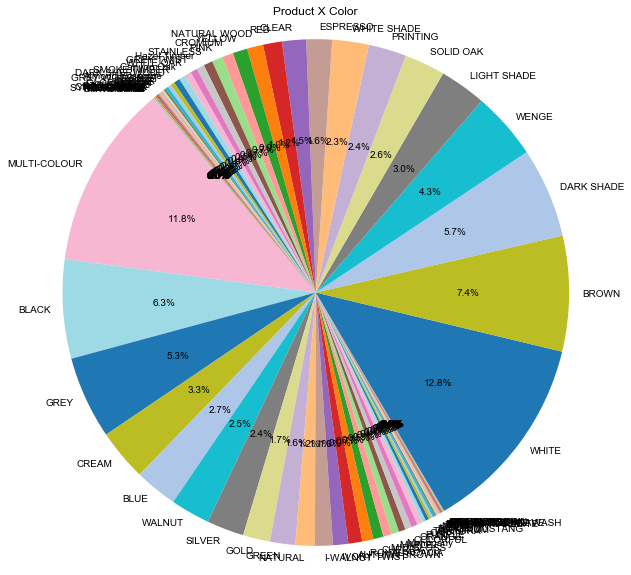

In [28]:
# Data to plot
sizes = size_odd+size_even
labels = label_odd+label_even
explode = np.zeros(len(sizes)) # explode max value
explode[sizes.index(max(sizes))] = 0.0
    
colors = []
for i in range(len(sizes)):
    colors.append(new_tableau20[i%len(new_tableau20)])
 
plt.figure(figsize=(10,10))
plt.rcParams["font.family"] = "Arial"
plt.pie(sizes,explode=explode,colors=colors, labels=labels,labeldistance=1.05,autopct='%1.1f%%', shadow=False, startangle=130)
plt.axis('equal')
plt.title("Product X Color")
plt.show()

# แบ่งกลุ่มตาม Material (MVGR7 x catmaterial.csv)

In [29]:
material = pd.read_csv('../data_clean/md7t_catmaterial.csv',dtype={'NODE':str})
print(len(material))
material[0:5]

61


,NODE,LTEXT
0,63,GRANDNADA STONE
1,60,WALL PAPER
2,58,WAX
3,59,MOSAIC
4,1,ALUMINUM FRAME


In [30]:
product_x_mat = pd.merge(material,product, how='left', left_on=['NODE'], right_on =['MVGR7'])
print(len(product_x_mat))
product_mat_grouped = product_x_mat.groupby(['LTEXT']).size().sort_values(ascending=False)
product_mat_grouped = product_mat_grouped[product_mat_grouped > 1]
print(len(product_mat_grouped))
product_mat_grouped

23022
53


LTEXT
FOIL                      6287
WOOD                      4806
FABRIC                    2815
METAL                     1451
GLASS                     1077
CERAMIC                   1048
GENUINE LEATHER            860
STEEL                      842
SYNTHETIC LEATHER          635
PLASTIC                    486
CRYSTAL HG                 391
STAINLESS                  371
RESIN                      253
ALUMINUM                   215
CLEAF SURFACE              193
PAPER                      165
SHORT CYCLE                162
NATURAL STONE              129
COATING HG                  94
SYNTHETIC RATTAN            86
CROMIUM                     77
WOOD RIFT                   72
POLYESTER                   66
STONE                       50
HIGH GLOSS                  43
VENEER                      38
WOOL                        36
ZINC                        25
HIGH PRESSURE LAMINATE      20
NANO LEATHER                19
PLASTIC/FIBER               19
ACRYLIC                     18
PO

In [31]:
old_labels = product_mat_grouped.keys()
old_sizes = product_mat_grouped.tolist()

In [32]:
label_odd = []
label_even = []
size_odd = []
size_even = []
for i in range(len(old_sizes)):
    if i%2 == 0:
        label_even.append(old_labels[i])
        size_even.append(old_sizes[i])
    else:
        label_odd.append(old_labels[i])
        size_odd.append(old_sizes[i]) 

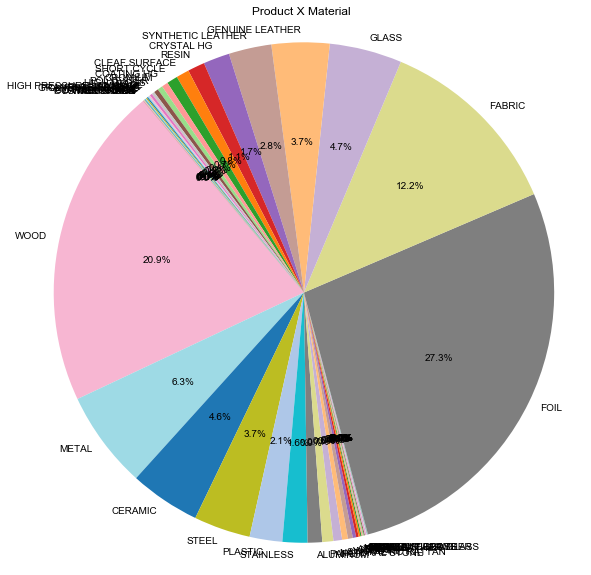

In [33]:
# Data to plot
sizes = size_odd+size_even
labels = label_odd+label_even
explode = np.zeros(len(sizes)) # explode max value
explode[sizes.index(max(sizes))] = 0.0
    
colors = []
for i in range(len(sizes)):
    colors.append(new_tableau20[i%len(new_tableau20)])
 
plt.figure(figsize=(10,10))
plt.rcParams["font.family"] = "Arial"
plt.pie(sizes,explode=explode,colors=colors, labels=labels,labeldistance=1.05,autopct='%1.1f%%', shadow=False, startangle=130)
plt.axis('equal')
plt.title("Product X Material")
plt.show()

# แบ่งกลุ่มตาม Set ห้อง

In [34]:
room_set = pd.read_csv('../data_clean/cat.csv',dtype={'CATEGORY_ID':str})
print(len(room_set))
room_set

9


,CATEGORY_ID,NAME_TH,NAME_EN
0,2001,คอนโด,Condo
1,2021,ห้องแต่งตัว,Walk-in Closet
2,2002,ห้องทานอาหาร,Dining room
3,2003,บ้านสวย,Home Decor
4,1,ห้องนอน,Bedroom
5,8,ห้องครัว,Kitchen
6,6,ห้องนั่งเล่น,Living Room
7,9,ห้องนอนเด็ก,Kids & Teens
8,10,ห้องทำงาน,Office Furniture


In [35]:
product_x_room = pd.merge(room_set,product, how='left', left_on=['CATEGORY_ID'], right_on =['DEPT_ID1'])
print(len(product_x_room))
product_room_grouped = product_x_room.groupby(['NAME_EN']).size().sort_values(ascending=False)
product_room_grouped = product_room_grouped[product_room_grouped > 1]
print(len(product_room_grouped))
product_room_grouped

15448
5


NAME_EN
Living Room         8431
Bedroom             6350
Kitchen              588
Kids & Teens          73
Office Furniture       2
dtype: int64

In [36]:
old_labels = product_room_grouped.keys()
old_sizes = product_room_grouped.tolist()

In [37]:
label_odd = []
label_even = []
size_odd = []
size_even = []
for i in range(len(old_sizes)):
    if i%2 == 0:
        label_even.append(old_labels[i])
        size_even.append(old_sizes[i])
    else:
        label_odd.append(old_labels[i])
        size_odd.append(old_sizes[i]) 

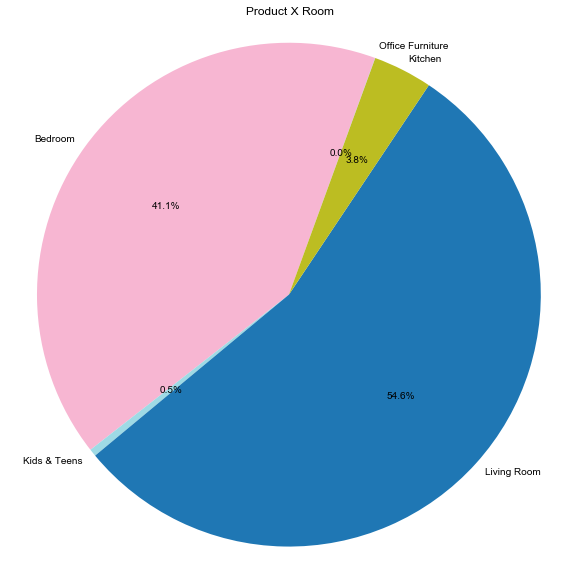

In [38]:
# Data to plot
sizes = size_odd+size_even
labels = label_odd+label_even
explode = np.zeros(len(sizes)) # explode max value
explode[sizes.index(max(sizes))] = 0.0
    
colors = []
for i in range(len(sizes)):
    colors.append(new_tableau20[i%len(new_tableau20)])
 
plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,colors=colors, labels=labels,labeldistance=1.05,autopct='%1.1f%%', shadow=False, startangle=70)
plt.axis('equal')
plt.title("Product X Room")
plt.show()